In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [43]:
df = pd.read_csv("./data/fcc-forum-pageviews.csv", parse_dates=["date"], index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [44]:
# Filtering out the top and bottom 2.5% of page views
lower = df["value"].quantile(0.025)
upper = df["value"].quantile(0.975)

df = df[(df["value"] >= lower) & (df["value"] <= upper)]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

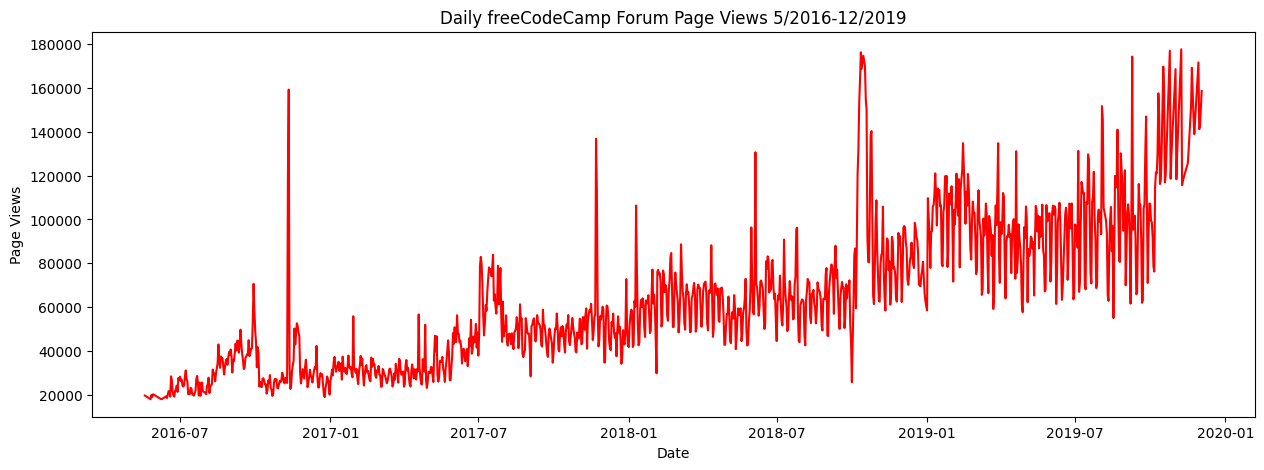

In [45]:
plt.subplots(figsize=(15, 5))
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.plot(df.index, df["value"], color='red')

### Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

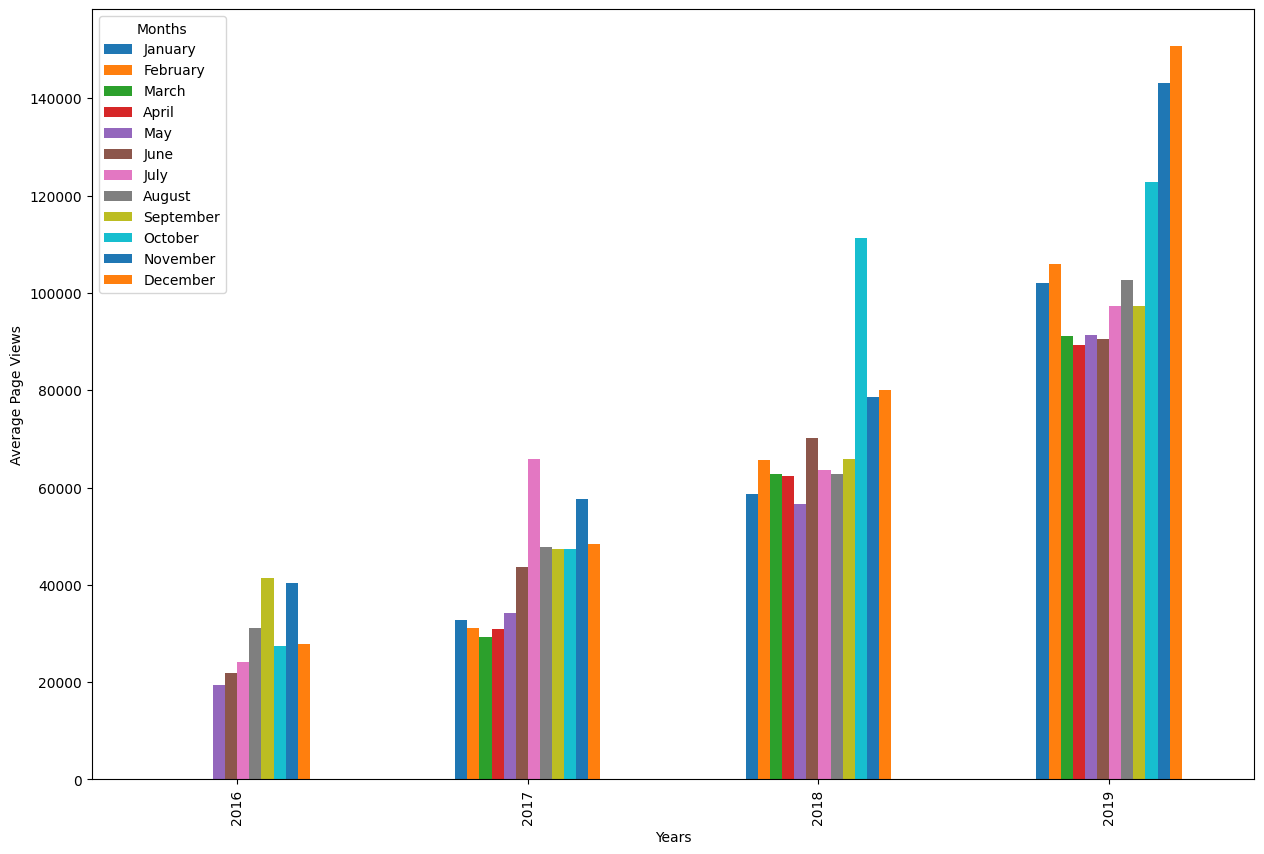

In [46]:
df_bar = df.copy()
df_bar["year"] = df_bar.index.year
df_bar["month"] = df_bar.index.month

# Grouping by year and month, calculate mean
df_bar = df_bar.groupby(["year", "month"])["value"].mean().unstack()

# Plotting bar chart
fig = df_bar.plot(kind="bar", figsize=(15, 10)).figure

# Setting labels and legend 
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(
    title="Months",
    labels=[
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]
)

### Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

C:\Users\rando\AppData\Local\Temp\ipykernel_13212\1501085243.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="year", y="value", data=df_box, ax=axes[0], palette="viridis")
C:\Users\rando\AppData\Local\Temp\ipykernel_13212\1501085243.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="value", data=df_box, ax=axes[1],


Text(0, 0.5, 'Page Views')

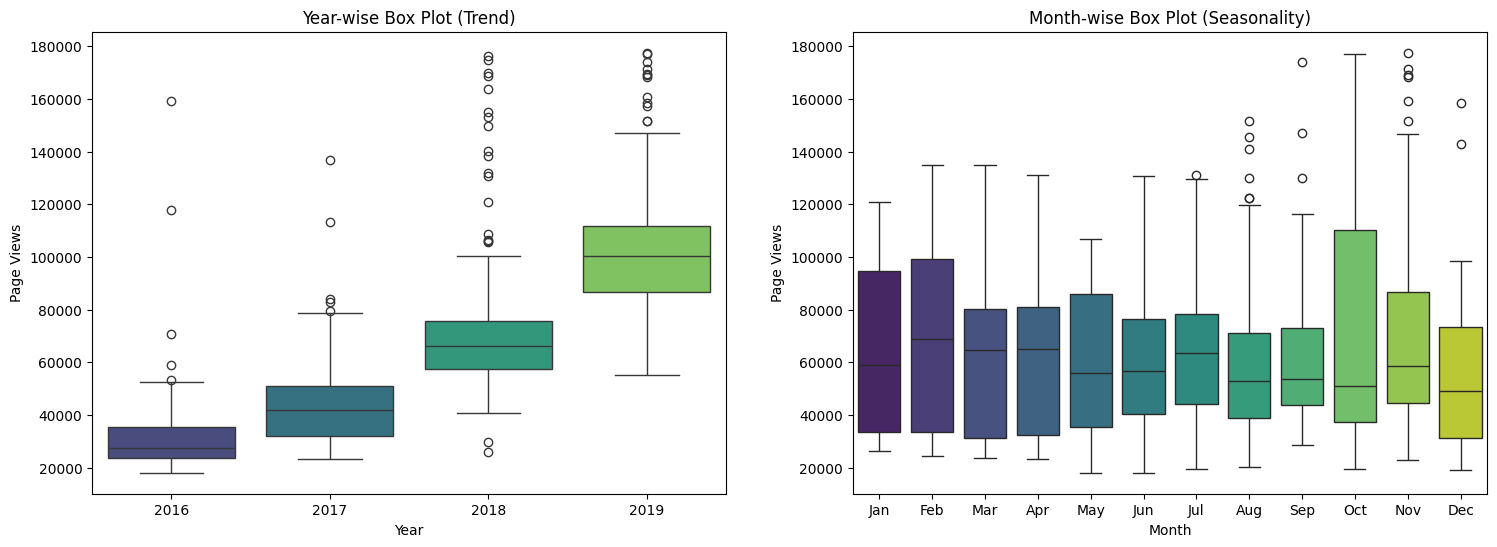

In [47]:
df_box = df.copy()
df_box.reset_index(inplace=True)           
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]  

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Year-wise box plot (Trend)
sns.boxplot(x="year", y="value", data=df_box, ax=axes[0], palette="viridis")
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

# Month-wise box plot (Seasonality)
sns.boxplot(x="month", y="value", data=df_box, ax=axes[1],
            order=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], palette="viridis")
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")